# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from dateutil.relativedelta import relativedelta

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
bs = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mtable = bs.find('tbody')

Rows = mtable.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create empty lists
id = []
td = []
sol = []
ls = []
month = []
mt = []
pres = []

# Loop through the scraped data to create a list of rows
for _ in Rows:
    id.append(_.find_all('td')[0].text)
    td.append(_.find_all('td')[1].text)
    sol.append(_.find_all('td')[2].text)
    ls.append(_.find_all('td')[3].text)
    month.append(_.find_all('td')[4].text)
    mt.append(_.find_all('td')[5].text)
    pres.append(_.find_all('td')[6].text)

In [7]:
# Confirm DataFrame was created successfully
SuperDict = {"ID" : id, 'Terrestrial_Date' : td, 'Sol' : sol, 'LS' : ls, 'Mars_Months' : month, 'Min_Temp' : mt, 'Pressure' : pres}
MarsScrapePD = pd.DataFrame(data = SuperDict)

MarsScrapePD.head()

,ID,Terrestrial_Date,Sol,LS,Mars_Months,Min_Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column


In [9]:
# Change data types for data analysis


In [10]:
# Confirm type changes were successful by examining data types again


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [11]:
#Converting Data..
MarsScrapePD['Pressure'] = pd.to_numeric(MarsScrapePD.Pressure)
MarsScrapePD['Min_Temp'] = pd.to_numeric(MarsScrapePD.Min_Temp)
MarsScrapePD['Mars_Months'] = pd.to_numeric(MarsScrapePD.Mars_Months)
MarsScrapePD['LS'] = pd.to_numeric(MarsScrapePD.LS)
MarsScrapePD['Terrestrial_Date'] = pd.to_datetime(MarsScrapePD.Terrestrial_Date)
MarsScrapePD['Sol'] = pd.to_numeric(MarsScrapePD.Sol)


In [12]:
# 1. How many months are there on Mars?

Maths = MarsScrapePD['Mars_Months'].max()

print('According to our dataset, there are ' + str(Maths) + ' Months in one mars year.')

According to our dataset, there are 12 Months in one mars year.


In [13]:
# 2. How many Martian days' worth of data are there?
UniqueDays = len(pd.unique(MarsScrapePD['Sol']))
print('This Dataset has ' + str(UniqueDays) + " Martian days'(sol) worth of data.")

This Dataset has 1867 Martian days'(sol) worth of data.


In [14]:
# 3. What is the average low temperature by month?
#Make a dictionary(mTemp) to hold all months' data
mTemp = {}
#loops to append each months' data to it's own dicti key
for _ in range(0, int(Maths)):
    mTemp[_] = MarsScrapePD[MarsScrapePD['Mars_Months'] == (1+_)]

#creates a list of the averages from each dictionary key
MonthTempAvg = []
for _ in range(0, int(Maths)):
    MonthTempAvg.append(mTemp[_]['Min_Temp'].mean())

#Lists the average of temperature lows by months
print('The average low temperature by month is ' + str(sum(MonthTempAvg)/len(MonthTempAvg)))

The average low temperature by month is -75.50100255873393


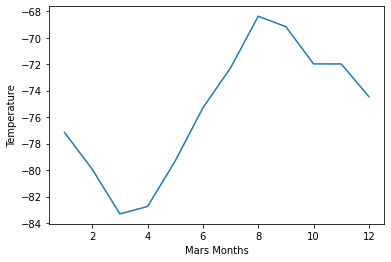

In [15]:
# Plot the average temperature by month
months = []
for _ in range(1, 13):
    months.append(_)

plt.plot(months, MonthTempAvg)
plt.xlabel('Mars Months')
plt.ylabel('Temperature')
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
#Coldest Month
x = min(MonthTempAvg)
ColdMonth = MonthTempAvg.index(x)

#Hottest Month
y = max(MonthTempAvg)
HotMonth = MonthTempAvg.index(y)

print('The Coldest month is: month', ColdMonth,'at', x,". The Hottest month is: month", HotMonth, 'at', y, '.')

The Coldest month is: month 2 at -83.30729166666667 . The Hottest month is: month 7 at -68.38297872340425 .


In [17]:
# 4. Average pressure by Martian month
#Make a dictionary(dicti) to hold all months' data
mPres = {}
#loops to append each months' data to it's own dicti key
for _ in range(0, int(Maths)):
    mPres[_] = MarsScrapePD[MarsScrapePD['Mars_Months'] == (1+_)]

#creates a list of the averages from each dictionary key
MonthPresAvg = []
for _ in range(0, int(Maths)):
    MonthPresAvg.append(mPres[_]['Pressure'].mean())

MonthPresAvg

[862.4885057471264,
 889.4550561797753,
 877.3229166666666,
 806.3298969072165,
 748.5570469798657,
 745.0544217687075,
 795.1056338028169,
 873.8297872340426,
 913.3059701492538,
 887.3125,
 857.0144927536232,
 842.156626506024]

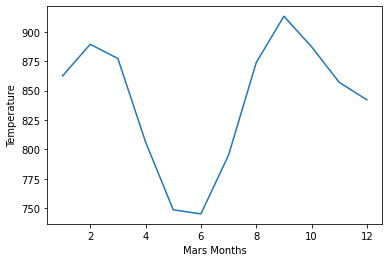

In [18]:
# Plot the average pressure by month
plt.plot(months, MonthPresAvg)
plt.xlabel('Mars Months')
plt.ylabel('Temperature')
plt.show()

In [19]:
#LowPressure Month
x = min(MonthPresAvg)
LPresMonth = MonthPresAvg.index(x)

#HighPressure Month
y = max(MonthPresAvg)
HPresMonth = MonthPresAvg.index(y)

print('The Lowest Pressure month is: month', LPresMonth,'at', x,". The Highest Pressure month is: month", HPresMonth, 'at', y, '.')

The Lowest Pressure month is: month 5 at 745.0544217687075 . The Highest Pressure month is: month 8 at 913.3059701492538 .


        ID Terrestrial_Date   Sol  LS  Mars_Months  Min_Temp  Pressure
304    320       2013-08-01   351   0            1     -75.0     853.0
305    319       2013-08-02   352   0            1     -77.0     854.0
925    954       2015-06-19  1019   0            1     -81.0     849.0
926    938       2015-06-20  1020   0            1     -63.0     832.0
1579  1606       2017-05-06  1688   0            1     -76.0     840.0
1580  1610       2017-05-07  1689   0            1     -75.0     840.0


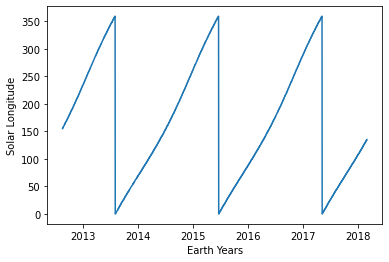

We can see the Solar Longitude is at 0 every 668 days. This shows in the plot, with a repeating time period that looks slightly less than 2 years. 


In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Prints out Rows where LS = 0. (Start of a year)
print(MarsScrapePD[MarsScrapePD['LS'] == 0])
#Plots the climb in LS. Everytime LS(Y-axis) is 0 would indicate a revolution.
plt.plot(MarsScrapePD['Terrestrial_Date'], MarsScrapePD['LS'])
plt.xlabel('Earth Years')
plt.ylabel('Solar Longitude')
plt.show()

#Equation for checking where LS is 0 (The planet is now in the same place, indicating one revolution or year)
#Using Iloc, to get a difference of Earth Years where LS = 0
a = MarsScrapePD.iloc[925, 2] - MarsScrapePD.iloc[304, 2]
print('We can see the Solar Longitude is at 0 every ' + str(a) + ' days. This shows in the plot, with a repeating time period that looks slightly less than 2 years. ')


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
MarsScrapePD.to_csv('output/CuriosityData.csv')

In [22]:
browser.quit()